# Data Bootcamp Project - Detroit versus Brooklyn ACS Data Analysis
Annie Jankowsi and Jamil Uddin

**Detroit has had a lot of media hype in the last 10 years about claims of gentrification. We thought it would be interesting to compare American Community Survey data from three well known neighborhoods in Brooklyn, New York that have been well known for gentrification in the past decade: Williamsburg, Bed Stuy and Bushwick. American Community Survey data was taken in the 2013 census.**


## Preliminaries 

In [2]:
import sys                             # system module 
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for Pandas 
import requests as r
from io import StringIO
import requests, io             # internet and input tools  
import zipfile as zf            # zip file tools 
import seaborn as sns
import sys
%matplotlib inline                     

# check versions
print('Python version: ', sys.version)
print('Pandas version: ', pd.__version__)
print('Today: ', dt.date.today())

Python version:  3.5.1 |Anaconda 4.0.0 (64-bit)| (default, Feb 16 2016, 09:49:46) [MSC v.1900 64 bit (AMD64)]
Pandas version:  0.18.0
Today:  2016-05-09


# Data Collection
All of our data for this analysis is pulled from online sources at the below URL links.

## 2013 American Community Survey (ACS) Data Set:

In [3]:
# get "response" from url 
url = 'http://www2.census.gov/acs2013_1yr/pums/csv_hus.zip'
r = requests.get(url) 

# describe response 
print('Response status code:', r.status_code)
print('Response type:', type(r))
print('Response .content:', type(r.content)) 
print('Response headers:\n', r.headers, sep='')

Response status code: 200
Response type: <class 'requests.models.Response'>
Response .content: <class 'bytes'>
Response headers:
{'Last-Modified': 'Thu, 12 Feb 2015 12:52:14 GMT', 'Content-Type': 'application/zip', 'Accept-Ranges': 'bytes', 'Date': 'Tue, 10 May 2016 00:50:52 GMT', 'ETag': '"15522b4-f7715e1-50ee396cdfb80"', 'Connection': 'keep-alive', 'Content-Length': '259462625', 'Server': 'Apache'}


In [4]:
# get "response" from url 
url1 = 'http://www2.census.gov/acs2013_1yr/pums/csv_pus.zip'
r1 = requests.get(url1) 

# describe response 
print('Response status code:', r1.status_code)
print('Response type:', type(r1))
print('Response .content:', type(r1.content)) 
print('Response headers:\n', r1.headers, sep='')

Response status code: 200
Response type: <class 'requests.models.Response'>
Response .content: <class 'bytes'>
Response headers:
{'Last-Modified': 'Thu, 12 Feb 2015 12:43:01 GMT', 'Content-Type': 'application/zip', 'Accept-Ranges': 'bytes', 'Date': 'Tue, 10 May 2016 01:02:14 GMT', 'ETag': '"15522e9-24bc646a-50ee375d7df40"', 'Connection': 'keep-alive', 'Content-Length': '616326250', 'Server': 'Apache'}


In [5]:
# convert bytes to zip file for housing data 
mlz = zf.ZipFile(io.BytesIO(r.content)) 
print('Type of zipfile object:', type(mlz))

Type of zipfile object: <class 'zipfile.ZipFile'>


In [6]:
# convert bytes to zip file  for population data
mlz1 = zf.ZipFile(io.BytesIO(r1.content)) 
print('Type of zipfile object:', type(mlz1))

Type of zipfile object: <class 'zipfile.ZipFile'>


In [7]:
# what's in the zip file?
mlz.namelist()

['ss13husa.csv', 'ss13husb.csv', 'ACS2013_PUMS_README.pdf']

In [8]:
# what's in the zip file?
mlz1.namelist()

['ss13pusa.csv', 'ss13pusb.csv', 'ACS2013_PUMS_README.pdf']

In [9]:
# extract and read csv's. These two files contain the housing data set:
housing1  = pd.read_csv(mlz.open(mlz.namelist()[0]))
housing2  = pd.read_csv(mlz.open(mlz.namelist()[1]))

In [10]:
# extract and read csv's. These two files contain the population data set:
population1  = pd.read_csv(mlz1.open(mlz1.namelist()[0]))
population2  = pd.read_csv(mlz1.open(mlz1.namelist()[1]))

Data dictionary can be found here:
http://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMSDataDict13.txt

PUMA info:
http://www2.census.gov/geo/pdfs/reference/puma/2010_PUMA_Names.pdf      
                                
 

In [11]:
#Get select columns
smallhousing = housing1[["SERIALNO","ST", "PUMA","NP", "BATH", "BDSP", "BLD", "CONP", "FS", "MRGP", "RMSP", "RNTP", "VACS", 
                        "VALP", "HINCP", "MV", "TAXP", "YBL"]]
smallhousing2 = housing2[["SERIALNO","ST", "PUMA","NP", "BATH", "BDSP", "BLD", "CONP", "FS", "MRGP", "RMSP", "RNTP", "VACS", 
                        "VALP", "HINCP", "MV", "TAXP", "YBL"]]
#Combine both dataframes into a single housing Dataframe:
housingdfs = [smallhousing, smallhousing2]
housingComplete = pd.concat(housingdfs)

#rename columns so we understand what they are:
housingComplete = housingComplete.rename(columns={'ST':'State', 'NP':'Number of Persons','BATH':'Bathrooms','BDSP':'Bedrooms',
                                            'BLD':'Units','CONP':'Condo_Fee','FS':'Food_Stamps?','MRGP':'Mortgage_Pmt', 
                                            'RMSP':'Number_Rooms','RNTP':'Monthly_Rent', 'VACS':'Vacancy_Status', 
                                            'VALP':'Property_Value','HINCP':'Household_Income', 'MV':'When_Moved', 
                                            'TAXP':'Property_Tax', 'YBL':'Year_Built'})
#Get select columns
smallpopulation1 = population1[["SERIALNO","PUMA","ST","DECADE","AGEP","SEX","SCHL"]]
smallpopulation2 = population2[["SERIALNO","PUMA","ST","DECADE","AGEP","SEX","SCHL"]]

#Combine both dataframes into a single population Dataframe:
populationdfs = [smallpopulation1, smallpopulation2]
populationComplete = pd.concat(populationdfs)
populationComplete = populationComplete.rename(columns={'ST':'State','AGEP':'Age'})

In [12]:
#Boolean Logic to refine data for Brooklyn
statecodesNYC = [36] #state code for NY
pumacodesNYC = [4003,4001,4002] #codes for Brooklyn (Bushwick, Bed Stuy, Williamsburg)
smallhousingNYC = housingComplete[(housingComplete['State'].isin(statecodesNYC) & housingComplete['PUMA'].isin(pumacodesNYC))]
smallpopulationNYC = populationComplete[(populationComplete['State'].isin(statecodesNYC) 
                                         & populationComplete['PUMA'].isin(pumacodesNYC))]
smallpopulationNYC.shape

(3648, 7)

In [13]:
#Boolean Logic to refine data for Detroit
statecodesMI = [26] #state code for MI
pumacodesDetroit = [3209,3210,3211,3212] #codes for Detroit
smallhousingDetroit = housingComplete[(housingComplete['State'].isin(statecodesMI) & housingComplete['PUMA'].isin(pumacodesDetroit))]
smallpopulationDetroit = populationComplete[(populationComplete['State'].isin(statecodesMI) 
                                         & populationComplete['PUMA'].isin(pumacodesDetroit))]
smallpopulationDetroit.shape

(3692, 7)

In [14]:
#Boolean Logic to refine data for Detroit and Brooklyn
statecodes = [26,36] #state code for Michigan and Brooklyn
pumacodes = [3209,3210,3211,3212,4003,4001,4002] #codes for detroit and Bushwick,Bed Stuy, and Williamsburg
smallhousingAll = housingComplete[(housingComplete['State'].isin(statecodes) & housingComplete['PUMA'].isin(pumacodes))]
smallpopulationAll = populationComplete[(populationComplete['State'].isin(statecodes) & populationComplete['PUMA'].isin(pumacodes))]
smallhousingAll.shape

(5312, 18)

In [15]:
smallhousingAll.head()

,SERIALNO,State,PUMA,Number of Persons,Bathrooms,Bedrooms,Units,Condo_Fee,Food_Stamps?,Mortgage_Pmt,Number_Rooms,Monthly_Rent,Vacancy_Status,Property_Value,Household_Income,When_Moved,Property_Tax,Year_Built
665844,1392,26,3209,5,1.0,3.0,2.0,NaN,1.0,NaN,6.0,900.0,NaN,NaN,46600.0,3.0,NaN,2.0
665858,2026,26,3210,2,1.0,4.0,4.0,NaN,2.0,NaN,10.0,NaN,NaN,11000.0,68000.0,6.0,22.0,1.0
665890,2866,26,3212,7,1.0,4.0,2.0,NaN,1.0,NaN,7.0,NaN,NaN,NaN,11000.0,1.0,NaN,1.0
665908,3606,26,3212,1,1.0,2.0,4.0,NaN,2.0,NaN,7.0,500.0,NaN,NaN,1800.0,6.0,NaN,2.0
665909,3636,26,3210,3,1.0,3.0,2.0,NaN,1.0,NaN,8.0,NaN,NaN,30000.0,20900.0,2.0,22.0,4.0


In [16]:
smallpopulationAll.head()

,SERIALNO,PUMA,State,DECADE,Age,SEX,SCHL
1429668,1392,3209,26,NaN,41,2,19.0
1429669,1392,3209,26,NaN,17,2,14.0
1429670,1392,3209,26,NaN,14,1,10.0
1429671,1392,3209,26,NaN,9,1,7.0
1429672,1392,3209,26,NaN,3,1,2.0


In [17]:
#Merge housing and population files to do analysis on specific variables that are in different dataframes
combo = pd.merge(smallhousingAll, smallpopulationAll,   # left and right df's
                 how='left',        # add to left 
                 on='SERIALNO'       # link with this variable/column 
                )
combo1 = combo[["Household_Income","DECADE"]].dropna()
combo2 = combo[["State_x","Household_Income","Age","SEX","SCHL"]].dropna()

In [22]:
comboNYC = pd.merge(smallhousingNYC, smallpopulationNYC,   # left and right df's
                 how='left',        # add to left 
                 on='SERIALNO'       # link with this variable/column 
                )
comboNYC1 = comboNYC[["Household_Income","DECADE"]].dropna()
comboNYC2 = comboNYC[["State_x","Household_Income","Age","SEX","SCHL"]].dropna()

In [29]:
comboDetroit = pd.merge(smallhousingDetroit, smallpopulationDetroit,   # left and right df's
                 how='left',        # add to left 
                 on='SERIALNO'       # link with this variable/column 
                )
comboDetroit1 = comboDetroit[["Household_Income","DECADE"]].dropna()
comboDetroit2 = comboDetroit[["State_x","Household_Income","Age","SEX","SCHL"]].dropna()

**These two scatter plots below compare Detroit and Brooklyn residents income by age. Income in Brooklyn is clearly much higher than in Detroit. These three neighborhoods in Brooklyn clearly have more residents as well, indicating Detroit is less densly populated.**

(0, 1600000)

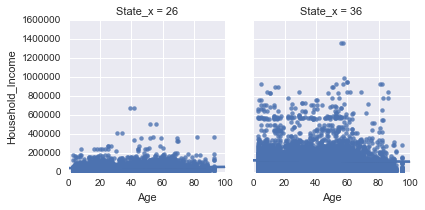

In [19]:
g4 = sns.FacetGrid(combo2, col="State_x")  
g4.map(sns.regplot, "Age", "Household_Income")  
plt.xlim(0, 100)  
plt.ylim(0, 1600000) 

**The below joint plots indicate a younger population base in Brooklyn vs. Detroit, with a higher income range as well.**

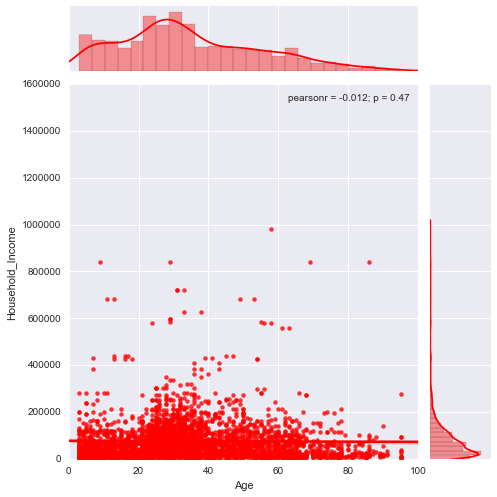

In [31]:
#combo2.plot.scatter("Age","Household_Income")

#Joint Plot showing Age vs. Household Income in NYC
g1 = sns.jointplot("Age","Household_Income", data=comboNYC2, kind="reg",
                  xlim=(0, 100), ylim=(0, 1600000), color="r", size=7)

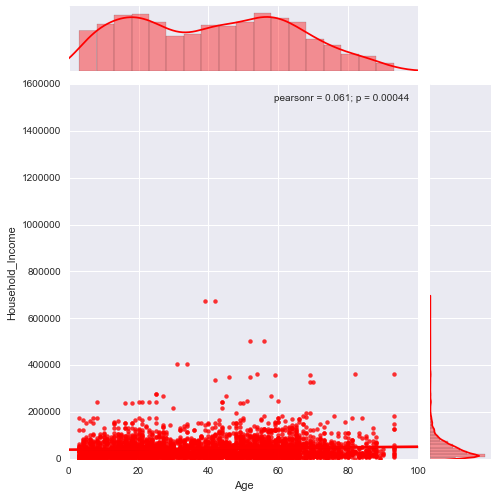

In [32]:
#combo2.plot.scatter("Age","Household_Income")

#Joint Plot showing Age vs. Household Income in Detroit
g2 = sns.jointplot("Age","Household_Income", data=comboDetroit2, kind="reg",
                  xlim=(0, 100), ylim=(0, 1600000), color="r", size=7)

**The below plot indicates the residents that moved to Detroit by decade and their respective incomes. A 1 indicates the residents moved in before 1950 and the numbers increase to 7 which is later than 2000.**

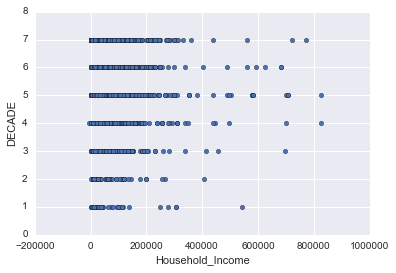

In [33]:
combo1.plot.scatter("Household_Income","DECADE")

**The below plot indicates the residents that moved to Williamsburg, Bed Stuy, and Bushwick by decade and their respective incomes.**

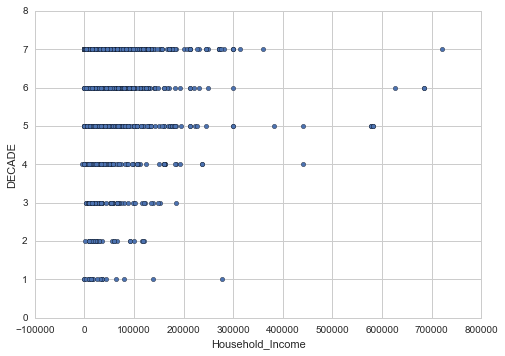

In [54]:
comboNYC.plot.scatter("Household_Income","DECADE")

**The below histogram demonstrates the number of people in Detroit that are paying different levels of mortgage payments.**

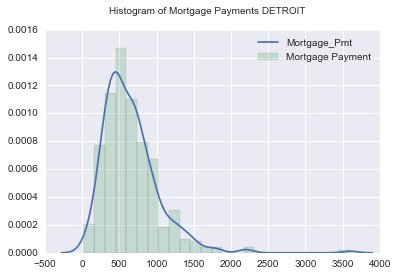

In [35]:
fig, ax = plt.subplots()

sns.kdeplot(smallhousingDetroit["Mortgage_Pmt"], ax=ax)
ax.hist(smallhousingDetroit["Mortgage_Pmt"].dropna(), bins=25, alpha=0.25, normed=True, label="Mortgage Payment")
ax.legend()

fig.suptitle("Histogram of Mortgage Payments DETROIT")

plt.show()

**The below histogram demonstrates the number of people in the three Brooklyn neighborhoods that are paying different levels of mortgage payments.**

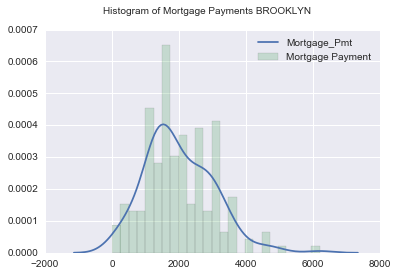

In [36]:
fig, ax = plt.subplots()

sns.kdeplot(smallhousingNYC["Mortgage_Pmt"], ax=ax)
ax.hist(smallhousingNYC["Mortgage_Pmt"].dropna(), bins=25, alpha=0.25, normed=True, label="Mortgage Payment")
ax.legend()

fig.suptitle("Histogram of Mortgage Payments BROOKLYN")

plt.show()

**The histograms below reflect the number of people at varying income levels for Detroit ont he left and Brooklyn on the right.  The concentration of lower income residents in Detroit is much higher.**

(0, 250000)

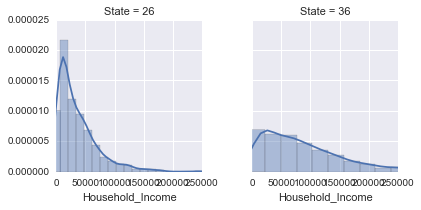

In [38]:
g2 = sns.FacetGrid(smallhousingAll, col="State")  
g2.map(sns.distplot, "Household_Income")  
plt.xlim(0, 250000)  
#plt.ylim(0, .00003) 


**The below plot compares the number of people who own homes with varying numbers of bedrooms at different mortgage payment levels on food stamps (1) and not on food stamps(2) in Detroit.**

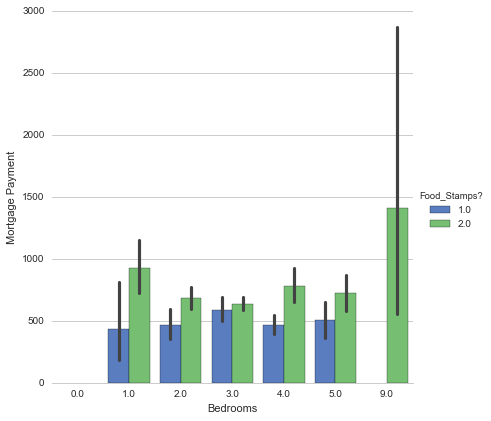

In [39]:
sns.set(style="whitegrid")

# Draw a nested barplot to show mortgage payments by number of bedrooms, for people who have or don't have foodstamps
g = sns.factorplot(x="Bedrooms", y="Mortgage_Pmt", hue="Food_Stamps?", data=smallhousingDetroit,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Mortgage Payment")


**The below plot compares the number of people who own homes with varying numbers of bedrooms at different mortgage payment levels on food stamps (1) and not on food stamps (2) in WIlliamsburg, Bushwick and Bed Stuy.  There are a higher level of residents in Detroit than Brooklyn on foodstamps**

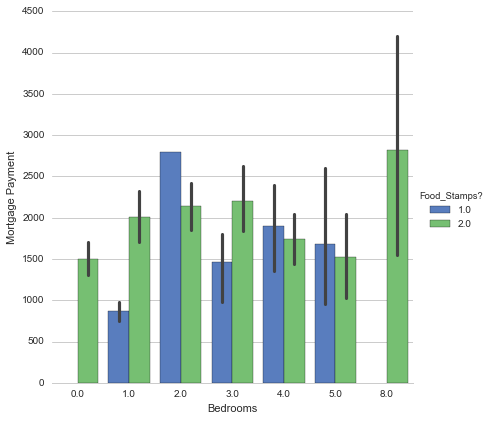

In [40]:
sns.set(style="whitegrid")

# Draw a nested barplot to show mortgage payments by number of bedrooms, for people who have or don't have foodstamps
g = sns.factorplot(x="Bedrooms", y="Mortgage_Pmt", hue="Food_Stamps?", data=smallhousingNYC,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Mortgage Payment")

**The below bar chart demonstrates how rent levels vary by the number of bedrooms for a Detroit housing unit.**

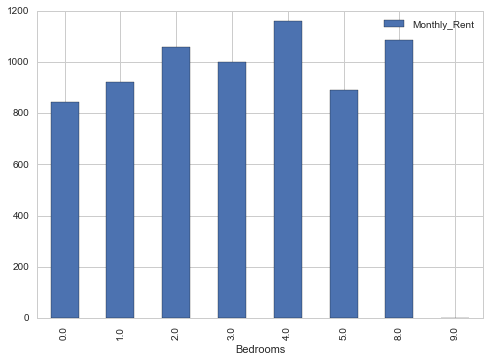

In [41]:
averageRent = smallhousingAll[["Monthly_Rent","Bedrooms"]]
fig1 = pd.pivot_table(averageRent,index=["Bedrooms"])
fig1.plot(kind = "bar")

**The below bar chart demonstrates how rent levels vary by the number of bedrooms for a Brooklyn housing unit.**

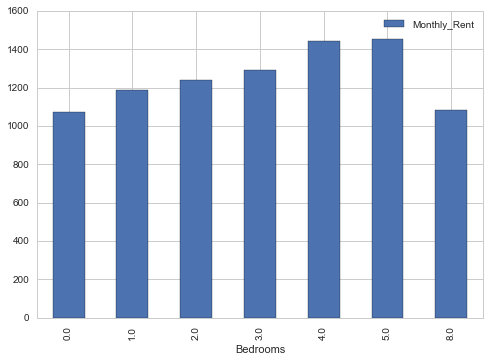

In [42]:
averageRent = smallhousingNYC[["Monthly_Rent","Bedrooms"]]
fig1 = pd.pivot_table(averageRent,index=["Bedrooms"])
fig1.plot(kind = "bar")

**The below histogram indicates how many buildings were built in these time periods in Brooklyn. The yearly data after 2005 indicates more buildings are being built per year in the last decade.**

**01 .1939 or earlier**

**02 .1940 to 1949**

**03 .1950 to 1959**

**04 .1960 to 1969**

**05 .1970 to 1979**

**06 .1980 to 1989**

**07 .1990 to 1999**

**08 .2000 to 2004**

**09 .2005**

**10 .2006**

**11 .2007**

**12 .2008**

**13 .2009**

**14 .2010**

**15 .2011**

**16 .2012**

**17 .2013**

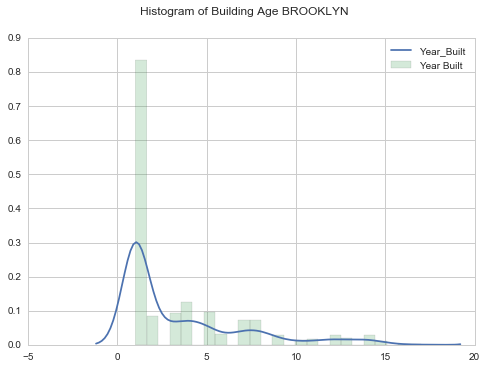

In [43]:
fig, ax = plt.subplots()

sns.kdeplot(smallhousingNYC["Year_Built"], ax=ax)
ax.hist(smallhousingNYC["Year_Built"].dropna(), bins=25, alpha=0.25, normed=True, label="Year Built")
ax.legend()

fig.suptitle("Histogram of Building Age BROOKLYN")

plt.show()


**The below histogram indicates how many buildings were built in these time periods in Detroit. The number of new builds is much lower in Detroit than Brooklyn.**

**01 .1939 or earlier**

**02 .1940 to 1949**

**03 .1950 to 1959**

**04 .1960 to 1969**

**05 .1970 to 1979**

**06 .1980 to 1989**

**07 .1990 to 1999**

**08 .2000 to 2004**

**09 .2005**

**10 .2006**

**11 .2007**

**12 .2008**

**13 .2009**

**14 .2010**

**15 .2011**

**16 .2012**

**17 .2013**

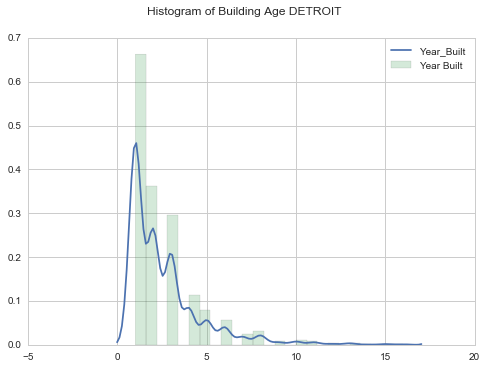

In [44]:
fig, ax = plt.subplots()

sns.kdeplot(smallhousingDetroit["Year_Built"], ax=ax)
ax.hist(smallhousingDetroit["Year_Built"].dropna(), bins=25, alpha=0.25, normed=True, label="Year Built")
ax.legend()

fig.suptitle("Histogram of Building Age DETROIT")

plt.show()